# NNodely Documentation - Fuzzify Layer

Represents a Fuzzyfy relation block in the neural network model.

This block is used to implement fuzzy logic inside the neural network.

In [1]:
# uncomment the command below to install the nnodely package
#!pip install nnodely

from nnodely import *

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>-- nnodely_v1.5.0 --<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


## Basic Usage
Create a fuzzy layer with 5 membership functions in a range [1,5] of the input variable

(if not specified, by default it uses the 'triangular' function)

================================ nnodely Model =================================
{'Constants': {},
 'Functions': {'FFuzzify2': {'centers': [1.0, 2.0, 3.0, 4.0, 5.0],
                             'dim_out': {'dim': 5},
                             'functions': 'Triangular',
                             'names': 'Triangular'}},
 'Info': {'SampleTime': 1,
          'nnodely_version': '1.5.0',
          'ns': [1, 0],
          'ntot': 1,
          'num_parameters': 0},
 'Inputs': {'x': {'dim': 1, 'ns': [1, 0], 'ntot': 1, 'sw': [-1, 0]}},
 'Models': 'model',
 'Outputs': {'out': 'Fuzzify2'},
 'Parameters': {},
 'Relations': {'Fuzzify2': ['Fuzzify', ['SamplePart1'], 'FFuzzify2'],
               'SamplePart1': ['SamplePart', ['x'], -1, [-1, 0]]}}


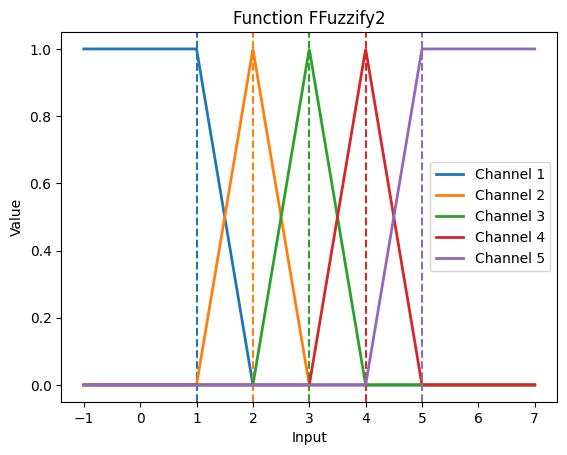

In [2]:
x = Input('x')
fuz = Fuzzify(5,[1,5])
out = Output('out',fuz(x.last()))

example = Modely(visualizer=MPLNotebookVisualizer())
example.addModel('model',out)
example.neuralizeModel()
example.visualizer.showFunctions(list(example._model_def['Functions'].keys()))

## Rectangular function

Create 6 membership functions by dividing the range from 1, 6 with rectangular functions centers are in [1,2,3,4,5,6] functions are 1 wide except the first and last.

the result vector should be: [[-inf, 1.5] [1.5,2.5] [2.5,3.5] [3.5,4.5] [4.5,5.5] [5.5.inf]]

[check_names] The name 'x' is already in defined as NeuObj but it is overwritten.
[check_names] The name 'out' is already in defined as NeuObj but it is overwritten.
================================ nnodely Model =================================
{'Constants': {},
 'Functions': {'FFuzzify5': {'centers': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
                             'dim_out': {'dim': 6},
                             'functions': 'Rectangular',
                             'names': 'Rectangular'}},
 'Info': {'SampleTime': 1,
          'nnodely_version': '1.5.0',
          'ns': [1, 0],
          'ntot': 1,
          'num_parameters': 0},
 'Inputs': {'x': {'dim': 1, 'ns': [1, 0], 'ntot': 1, 'sw': [-1, 0]}},
 'Models': 'model',
 'Outputs': {'out': 'Fuzzify5'},
 'Parameters': {},
 'Relations': {'Fuzzify5': ['Fuzzify', ['SamplePart4'], 'FFuzzify5'],
               'SamplePart4': ['SamplePart', ['x'], -1, [-1, 0]]}}


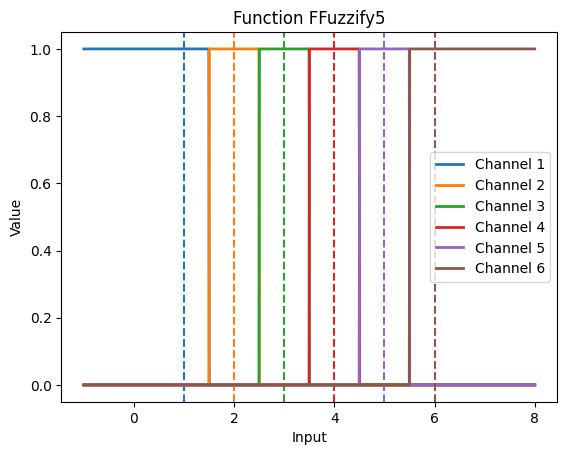

In [3]:
x = Input('x')
fuz = Fuzzify(6,[1,6], functions = 'Rectangular')
out = Output('out',fuz(x.last()))

example = Modely(visualizer=MPLNotebookVisualizer())
example.addModel('model',out)
example.neuralizeModel()
example.visualizer.showFunctions(list(example._model_def['Functions'].keys()))

## Custom functions

Create 10 membership functions by dividing the range from -5, 5 with a custom function (tanh). The centers are in [-5,-4,-3,-2,-1,0,1,2,3,4,5]

[check_names] The name 'x' is already in defined as NeuObj but it is overwritten.
[check_names] The name 'out' is already in defined as NeuObj but it is overwritten.
================================ nnodely Model =================================
{'Constants': {},
 'Functions': {'FFuzzify8': {'centers': [-5.0,
                                         -4.0,
                                         -3.0,
                                         -2.0,
                                         -1.0,
                                         0.0,
                                         1.0,
                                         2.0,
                                         3.0,
                                         4.0,
                                         5.0],
                             'dim_out': {'dim': 11},
                             'functions': 'def fun(x):\n'
                                          '    import torch\n'
                                          '    re

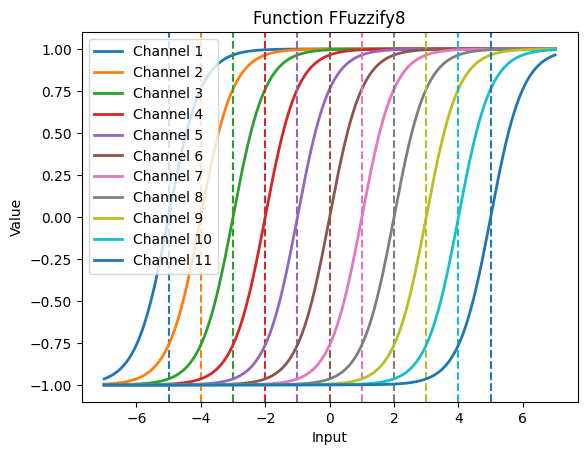

In [4]:
def fun(x):
    import torch
    return torch.tanh(x)

x = Input('x')
fuz = Fuzzify(output_dimension=11, range=[-5,5], functions=fun)
out = Output('out',fuz(x.last()))

example = Modely(visualizer=MPLNotebookVisualizer())
example.addModel('model',out)
example.neuralizeModel()
example.visualizer.showFunctions(list(example._model_def['Functions'].keys()))

## Multiple custom functions

Create 2 custom periodic functions that are positioned at -1 and 5

[check_names] The name 'x' is already in defined as NeuObj but it is overwritten.
[check_names] The name 'out' is already in defined as NeuObj but it is overwritten.
================================ nnodely Model =================================
{'Constants': {},
 'Functions': {'FFuzzify11': {'centers': [-1.0, 5.0],
                              'dim_out': {'dim': 2},
                              'functions': ['def fun1(x):\n'
                                            '    import torch\n'
                                            '    return torch.sin(x)\n',
                                            'def fun2(x):\n'
                                            '    import torch\n'
                                            '    return torch.cos(x)\n'],
                              'names': ['fun1', 'fun2']}},
 'Info': {'SampleTime': 1,
          'nnodely_version': '1.5.0',
          'ns': [1, 0],
          'ntot': 1,
          'num_parameters': 0},
 'Inputs': {'x': {'dim': 1, 

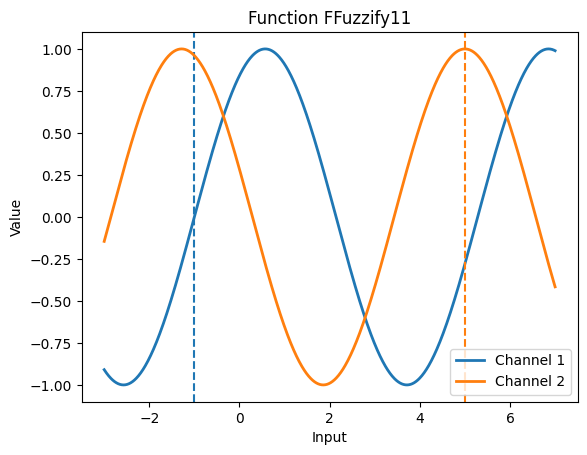

In [5]:
def fun1(x):
    import torch
    return torch.sin(x)

def fun2(x):
    import torch
    return torch.cos(x)

x = Input('x')
fuz = Fuzzify(2,range=[-1,5],functions=[fun1,fun2])
out = Output('out',fuz(x.last()))

example = Modely(visualizer=MPLNotebookVisualizer())
example.addModel('model',out)
example.neuralizeModel()
example.visualizer.showFunctions(list(example._model_def['Functions'].keys()))

## Repeated custom functions
Create 4 custom membership functions that are positioned at [-1,0,3,5]

[check_names] The name 'x' is already in defined as NeuObj but it is overwritten.
[check_names] The name 'out' is already in defined as NeuObj but it is overwritten.
================================ nnodely Model =================================
{'Constants': {},
 'Functions': {'FFuzzify15': {'centers': [-1, 0, 3, 5],
                              'dim_out': {'dim': 4},
                              'functions': ['def fun1(x):\n'
                                            '    return torch.sin(x)\n',
                                            'def fun2(x):\n'
                                            '    return torch.cos(x)\n',
                                            'def fun1(x):\n'
                                            '    return torch.sin(x)\n',
                                            'def fun2(x):\n'
                                            '    return torch.cos(x)\n'],
                              'names': ['fun1', 'fun2', 'fun1', 'fun2']}},
 'Info': {'Sam

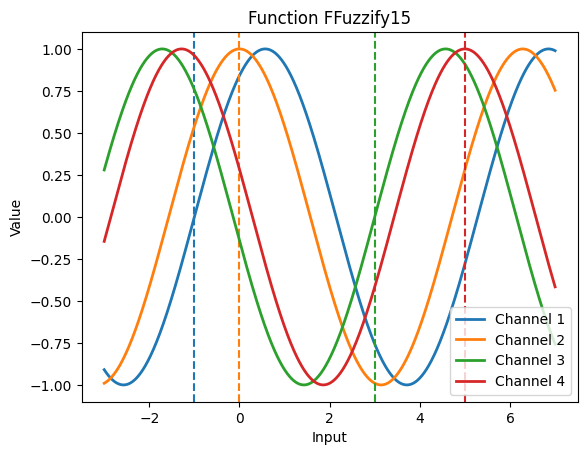

In [6]:
import torch

def fun1(x):
    return torch.sin(x)
def fun2(x):
    return torch.cos(x)

x = Input('x')
F = Input('F')

fuz = Fuzzify(centers=[-1,0,3,5],functions=[fun1,fun2,fun1,fun2])
out = Output('out',fuz(x.last())+fuz(F.last()))

example = Modely(visualizer=MPLNotebookVisualizer())
example.addModel('model',out)
example.neuralizeModel()
example.visualizer.showFunctions(list(example._model_def['Functions'].keys()))